# Part 1 steps
First thing will be: what data structure to we want to parse the orbit data into?

1. Lad data from file into dictionary, so that we can look up the center for each planet.
2. Compute the total amount of orbits by starting with each planet once and then successively following the planet around which it rotates until at the absolute center.


## previous guesses for part 1
150115 - too high

148961 - too high

147807 - correct!


## load data into dictionary


In [1]:
import pprint as pp

input_path = "6 - Universal Orbit Map/input/orbit_map_p1.txt"
orbit_map = dict()
with open(input_path, "r") as fh:
    # create entry for common mass (the sun)
    for i, l in enumerate(fh):
        center, sattelite = l.strip().split(")")
        orbit_map[sattelite] = center
# pp.pprint(orbit_map)
# print(len(orbit_map))  # should be 1154

## gather total amount of orbits


In [2]:
total = 0
for planet in orbit_map:
    while planet in orbit_map:
        total += 1
        planet = orbit_map[planet]
print(total)

147807


# Part 2 - steps

1. Use networkx to create a undirected graph from the dictionary data.
1. Find the shortest path between the planet YOU are orbiting and the one SANTA is orbiting.

## previous guesses for part 2

* 230 - too high; for this guess I took len(nodes_in_path), but this is one too high, as edges are *between* nodes (¡a path list with 1 edge requires 2 nodes not 1!)..
* 229 - correct; networkx even offers a direct method to measure the length of a shortest path. No need to compute the length manually via len(shortest_path), unless perhaps you need the nodes in the path anyway.


In [3]:
import networkx

orbit_graph = networkx.Graph()
# nodes are created as necessary
orbit_graph.add_edges_from(orbit_map.items())
# networkx can return the shortest path between 2 nodes a list of edges
shortest_path = networkx.shortest_path(orbit_graph, 'YOU', 'SAN')
# The question asks for the shortest path between the 2 planets that YOU and SAN are orbiting, not between YOU and SAN. Thus we have to subtract 2 jumps.
min_orbital_transfers = networkx.shortest_path_length(orbit_graph, "YOU", "SAN") - 2
print(f"Minimum jumps required to orbit the same planet as SAN (Santa Claus):\n{min_orbital_transfers}")

Minimum jumps required to orbit the same planet as SAN (Santa Claus):
229


## drawing the orbital map
networkx also has basic support for that, but for precise controls you'll likely need to dive into matplotlib or gephi.


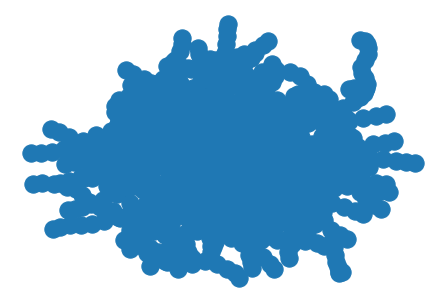

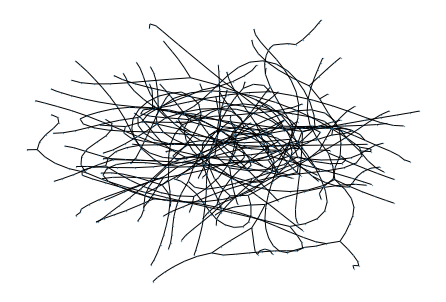

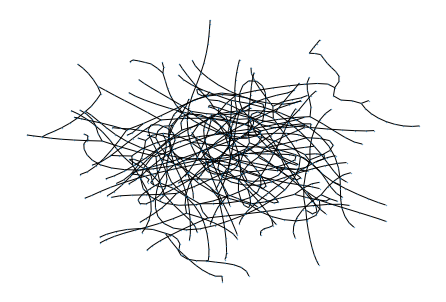

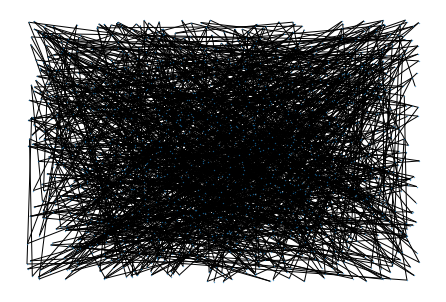

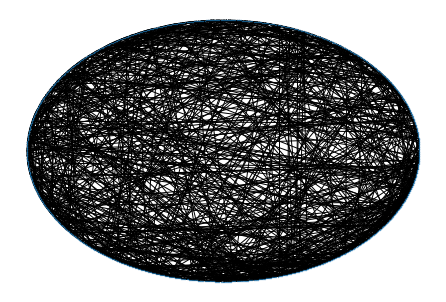

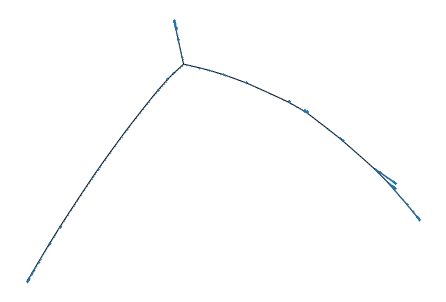

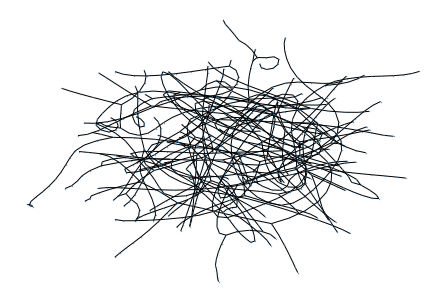

In [21]:
import matplotlib.pyplot as plt

figsize = (40.0, 40.0) # 40 * 40
f = 1
# default configuration
plt.figure(f)
f += 1
networkx.draw(orbit_graph)
plt.savefig("6 - Universal Orbit Map/output/orbit-1.png")
# smaller dots
plt.figure(f)
f += 1
networkx.draw(orbit_graph, figsize=figsize, size=4000, node_size=0.1)
plt.savefig("6 - Universal Orbit Map/output/orbit-2.png")

# different layouts
plt.figure(f)
f += 1
networkx.draw(orbit_graph, figsize=figsize, node_size=0.1)
plt.savefig("6 - Universal Orbit Map/output/orbit as default.png") 
plt.figure(f)
f += 1
networkx.draw_random(orbit_graph, figsize=figsize, node_size=0.1)
plt.savefig("6 - Universal Orbit Map/output/orbit as random.png")  
plt.figure(f)
f += 1
networkx.draw_circular(orbit_graph, figsize=figsize, node_size=0.1)
plt.savefig("6 - Universal Orbit Map/output/orbit as circular.png")  
plt.figure(f)
f += 1
networkx.draw_spectral(orbit_graph, figsize=figsize, node_size=0.1)  # this one seems to yield illustrative results
plt.savefig("6 - Universal Orbit Map/output/orbit as spectral.png")  
plt.figure(f)
f += 1
networkx.draw_spring(orbit_graph, figsize=figsize, node_size=0.1)
plt.savefig("6 - Universal Orbit Map/output/orbit as spring.png")  